In [1]:
import pandas as pd

In [2]:
df = pd.read_json('data/ucsb_speeches_2016.json')

In [3]:
df = df.reset_index().drop(columns=['index'])

In [4]:
df.loc[0]['transcript']

'\nHello Grand Valley! Thank you! Thank you.\nIt is great to be back in western Michigan. Thank you. Are there any Lakers here?\nOh, my gosh. I am so thrilled to be here. I want to thank the president of this great university, Tom Haas, the faculty, the staff, the students. I want to thank Brandon Dillon, the Chair of the Michigan Democratic Party. And I especially really want to thank you for sending Debbie Stabenow to the United States Senate.\nI have also the great personal experience and privilege of having worked with Debbie, gotten to know her, become a friend of hers, and I am so excited at the possibility that I\'ll be able to work with her again. But I want you to know this - and I really, really hope you\'ll tell folks, because there is no more dedicated, effective member of the United States Senate than Debbie Stabenow.\nShe fights for all of you every day, but she does it with that smile that never leaves her face. And she brings people together who are on opposite sides of

In [5]:
df

,link,title,date,person,transcript
0,/documents/remarks-grand-valley-state-universi...,Remarks at Grand Valley State University in Gr...,2016-11-07 00:00:00+00:00,Hillary Clinton,\nHello Grand Valley! Thank you! Thank you.\nI...
1,/documents/remarks-js-dorton-arena-raleigh-nor...,"Remarks at J.S Dorton Arena in Raleigh, North ...",2016-11-07 00:00:00+00:00,Donald J. Trump,\nThis is amazing. What a great place. Thank y...
2,/documents/remarks-north-carolina-state-univer...,Remarks at North Carolina State University in ...,2016-11-07 00:00:00+00:00,Hillary Clinton,\nThank you all! Whoa! Thank you! Thank you. W...
3,/documents/remarks-the-university-pittsburgh,Remarks at the University of Pittsburgh,2016-11-07 00:00:00+00:00,Hillary Clinton,"\nHello, Pittsburgh! Woah! Hello back there!\n..."
4,/documents/remarks-eastern-market-detroit-mich...,"Remarks at Eastern Market in Detroit, Michigan",2016-11-04 00:00:00+00:00,Hillary Clinton,"\nHello Detroit! Thank you! I'll tell you, I a..."
...,...,...,...,...,...
96,/documents/remarks-erie-insurance-arena-erie-p...,"Remarks at Erie Insurance Arena in Erie, Penns...",2016-08-12 00:00:00+00:00,Donald J. Trump,"\nThank you. Thank you, everybody. Thank you. ..."
97,/documents/remarks-rally-the-university-north-...,Remarks at a Rally at the University of North ...,2016-08-09 00:00:00+00:00,Donald J. Trump,\nThank you. Thank you very much. [applause] T...
98,/documents/remarks-the-detroit-economic-club-1,Remarks to the Detroit Economic Club,2016-08-08 00:00:00+00:00,Donald J. Trump,\nThank you for the invitation to speak to you...
99,/documents/remarks-the-ki-convention-center-gr...,Remarks at the KI Convention Center in Green B...,2016-08-05 00:00:00+00:00,Donald J. Trump,\nSo how good is he? How good is he? [applause...


In [6]:
dates = df.groupby(['person','date']).agg({'transcript': 'count'}).reset_index()

In [7]:
from matplotlib import pyplot as plt

In [8]:
dt_dates = dates[dates['person']=='Donald J. Trump'].drop(columns='person').set_index('date')
hc_dates = dates[dates['person']=='Hillary Clinton'].drop(columns='person').set_index('date')

In [9]:
idx = pd.date_range(min(dates.date), max(dates.date))
#dt_dates.set_index('date')
dt_dates = dt_dates.reindex(idx, fill_value=0)
hc_dates = hc_dates.reindex(idx, fill_value=0)

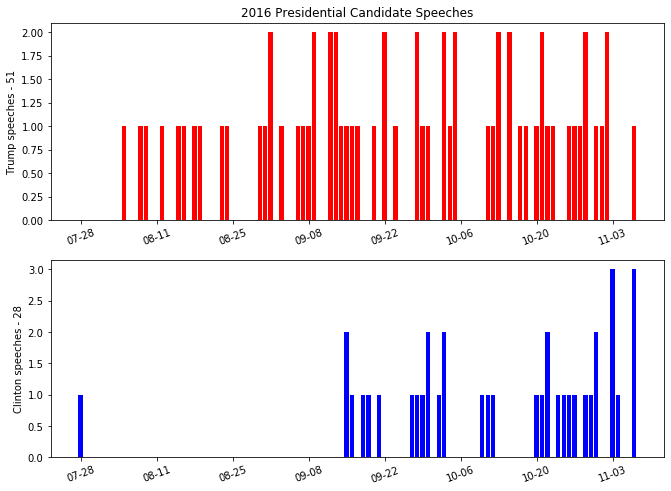

In [10]:
from matplotlib import dates as d
import numpy as np
#x = np.arange(0,len(idx),1)
fig, ax = plt.subplots(2,1)
fig.set_size_inches(11,8)
ax[0].bar(d.date2num(idx), dt_dates['transcript'], color="red")
ax[1].bar(d.date2num(idx), hc_dates['transcript'], color="blue")
xt = np.arange(min(d.date2num(idx)),max(d.date2num(idx)),step=14)
xl = [d.num2date(x).strftime('%m-%d') for x in xt]
ax[0].set_xticks(xt)
ax[1].set_xticks(xt)
ax[0].set_xticklabels(xl, rotation=20)
ax[1].set_xticklabels(xl, rotation=20)
ax[0].set_ylabel('Trump speeches - 51')
ax[1].set_ylabel('Clinton speeches - 28')
ax[0].set_title('2016 Presidential Candidate Speeches')
plt.show()